### Data Cleaning For Linear Regression

We are going to prepare some housing data to run a linear regression analysis. Let us start by importing the packages we are going to use and then downloading our data.

In [174]:
import plotly.io as pio
pio.renderers.default='notebook'

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [176]:
housing = pd.read_excel(r'C:\Users\clayt\RegressionPractice\VentaViviendas.xlsx')
housing.head()

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,653450,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,710000,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,780000,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,795000,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,399950,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328


### What will we check?

1. Variable types. How is python reading our specific variables?
2. Wrongly coded variables. Do we have any values that do not make any sense?
3. Variables that appear to be coded outside of a range that makes sense for them.
4. Outliers
5. Categorical variables
6. Missing data

### Variable Types

In [177]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   month         5000 non-null   int64  
 2   price         5000 non-null   int64  
 3   Luxury        5000 non-null   int64  
 4   bedrooms      5000 non-null   int64  
 5   bathrooms     5000 non-null   float64
 6   sqft_living   5000 non-null   int64  
 7   sqft_lot      5000 non-null   int64  
 8   floors        5000 non-null   float64
 9   waterfront    5000 non-null   int64  
 10  view          5000 non-null   int64  
 11  condition     5000 non-null   object 
 12  sqft_above    5000 non-null   int64  
 13  basement      5000 non-null   int64  
 14  yr_built      5000 non-null   int64  
 15  yr_renovated  5000 non-null   int64  
 16  lat           5000 non-null   float64
 17  long          5000 non-null   float64
dtypes: float64(4), int64(13), ob

From this we can see that not all of our variables appear to be coded correctly. In particular we should look at waterfront, view, condition and basement which appear to be categorical variables. We will keep this in mind for later on.

### Unique values for variables

Let us look at the total count of unique values for each of our variables.

In [178]:
housing.nunique()

year               2
month             12
price           1709
Luxury             2
bedrooms          33
bathrooms         12
sqft_living      570
sqft_lot        3113
floors             6
waterfront         3
view               2
condition          5
sqft_above       527
basement           2
yr_built         116
yr_renovated      58
lat             2985
long             602
dtype: int64

#### Interpretation

1. We will eliminate the variable year which shows the year within our dataset that the house sold. Since there are only two unique values it is not very useful for us.
2. It appears that we can categorize any variable with less than 7 unique values as categorical. That would give us the variables Luxury, floors, waterfront, view, condition and basement as our categorical variables with the rest our vaiables being continuous.
3. Waterfront having three unique values is something we should look into since it appears that it should be a binary variable.

In [179]:
housing = housing.drop(['year'], axis =1)

### Conversion of variables with less than 7 distinct values to type categorical

In [180]:
to_categorical = list(housing.loc[:,housing.nunique()<=7]);
housing[to_categorical] = housing[to_categorical].astype('category')

In [181]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   month         5000 non-null   int64   
 1   price         5000 non-null   int64   
 2   Luxury        5000 non-null   category
 3   bedrooms      5000 non-null   int64   
 4   bathrooms     5000 non-null   float64 
 5   sqft_living   5000 non-null   int64   
 6   sqft_lot      5000 non-null   int64   
 7   floors        5000 non-null   category
 8   waterfront    5000 non-null   category
 9   view          5000 non-null   category
 10  condition     5000 non-null   category
 11  sqft_above    5000 non-null   int64   
 12  basement      5000 non-null   category
 13  yr_built      5000 non-null   int64   
 14  yr_renovated  5000 non-null   int64   
 15  lat           5000 non-null   float64 
 16  long          5000 non-null   float64 
dtypes: category(6), float64(3), int64(8)
memory usage: 4

### Variable description

In [149]:
housing.describe()

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.589400,5.441291e+05,3.624200,2.139500,2077.382000,1.373248e+04,1784.89840,1971.084200,86.157000,47.561237,-122.213915
std,3.120377,3.729869e+05,3.710165,0.867606,916.477607,3.758144e+04,824.33091,29.242444,405.523818,0.138218,0.140557
min,1.000000,8.650000e+04,0.000000,0.000000,370.000000,-1.000000e+00,370.00000,1900.000000,0.000000,47.155900,-122.505000
25%,4.000000,3.249375e+05,3.000000,1.500000,1410.000000,4.500000e+03,1190.00000,1951.000000,0.000000,47.475275,-122.330000
50%,6.000000,4.510000e+05,3.000000,2.500000,1910.000000,7.312000e+03,1550.00000,1975.000000,0.000000,47.574500,-122.226500
75%,9.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.028425e+04,2220.00000,1996.000000,0.000000,47.678925,-122.124000
max,12.000000,7.062500e+06,70.000000,6.000000,10040.000000,1.164794e+06,7680.00000,2015.000000,2015.000000,47.777000,-121.352000


##### Interpretation

Sqft_lot has a minimum of -1 which is not possible. We will have to look in more detail at these data points. 

The variable yr_renovated we may decide to rencode as a binary variable to make our model more simple. 

The variable bedrooms has a max of 70 which will probably be an outlier.

In [183]:
housing.describe(exclude=np.number)

,Luxury,floors,waterfront,view,condition,basement
count,5000,5000.0,5000,5000,5000,5000
unique,2,6.0,3,2,5,2
top,0,1.0,0,0,B,0
freq,2886,2463.0,4852,4509,3254,3044


Waterfront having 3 possible values does not make sense. 

### Graphical Inspection

Let us define a function to visually display our data.

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



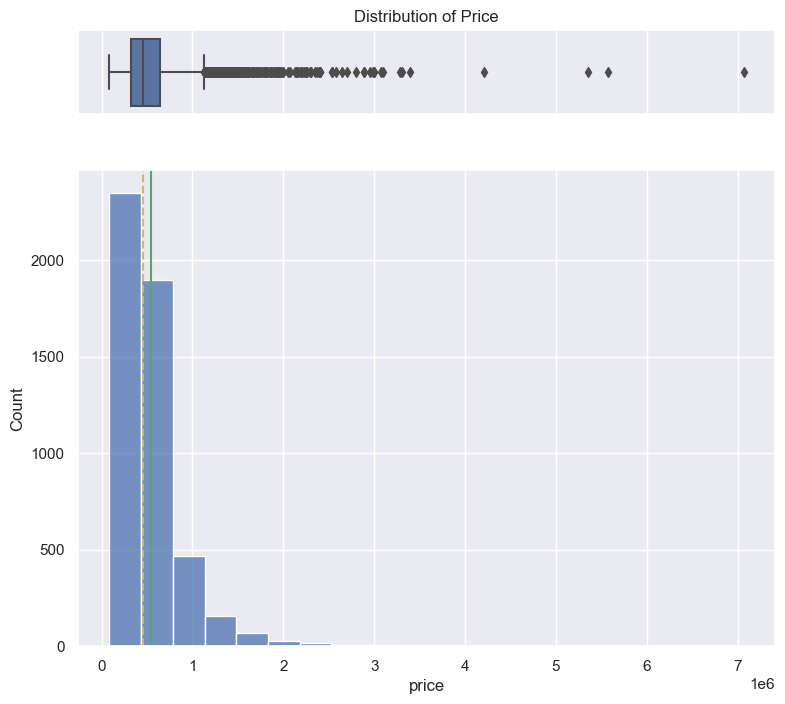

In [184]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,8), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    # Define font size
    sns.set(font_scale=font_scale)
    # Create subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Create boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Create histogram
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Add a line for the mean
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Add a line for the median
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Assign x and y axis labels
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # show the graphic
    plt.show()

histogram_boxplot(housing['price'], bins = 20, font_scale=1, title="Distribution of Price")


Next let us create a function so that we can obtain a barplot to visualize our catgorical variables

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='condition', ylabel='count'>

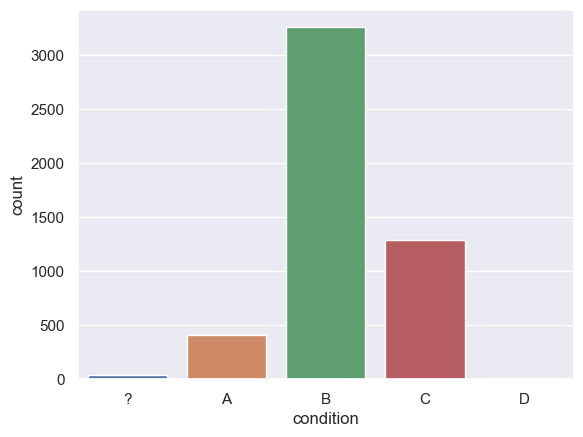

In [185]:
def cat_plot(col):
     if col.dtypes == 'category':
        fig = sns.countplot(x=col)
        return(fig)


cat_plot(housing.condition)

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



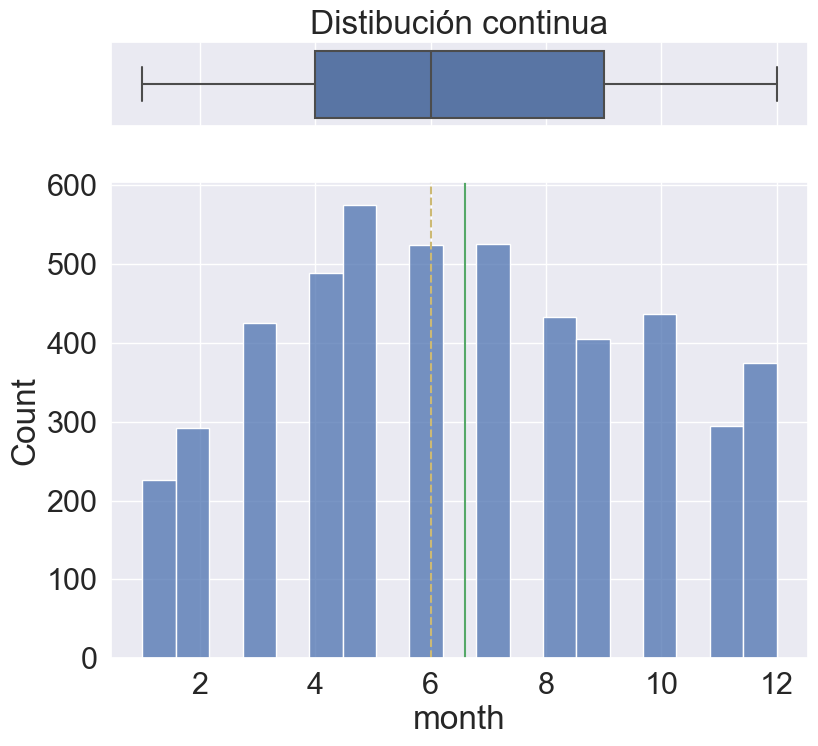

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



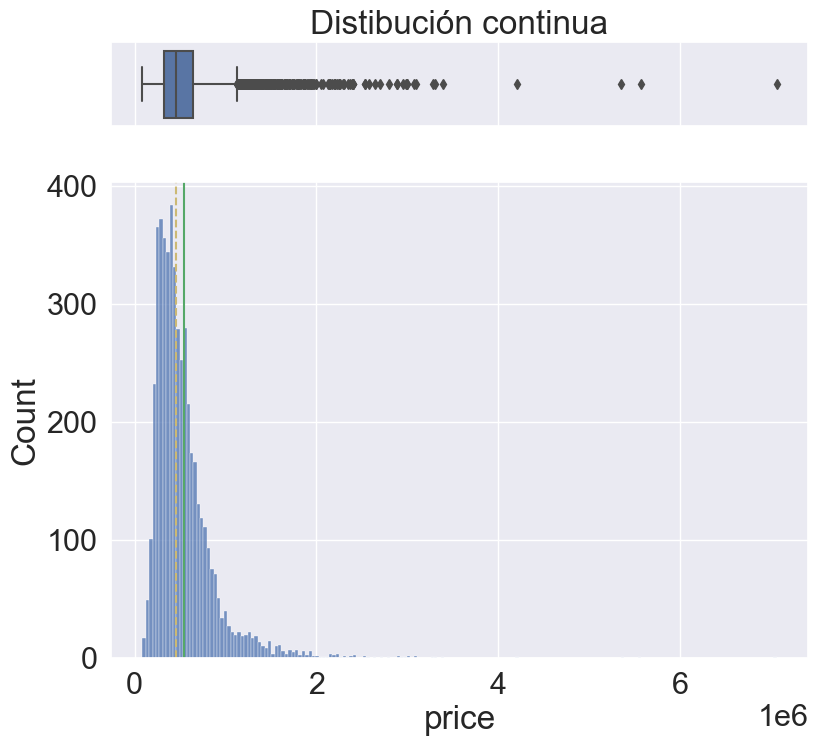

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



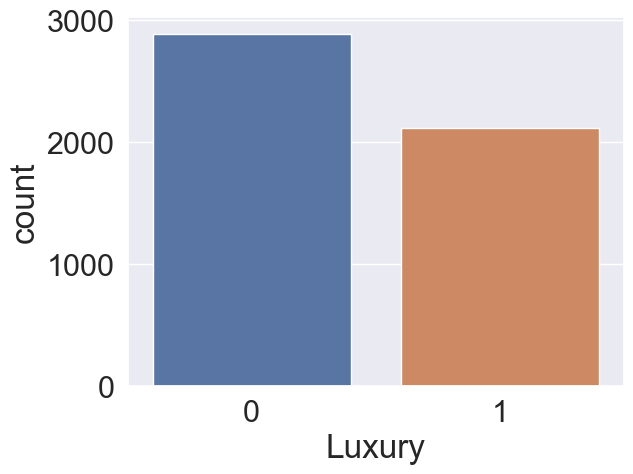

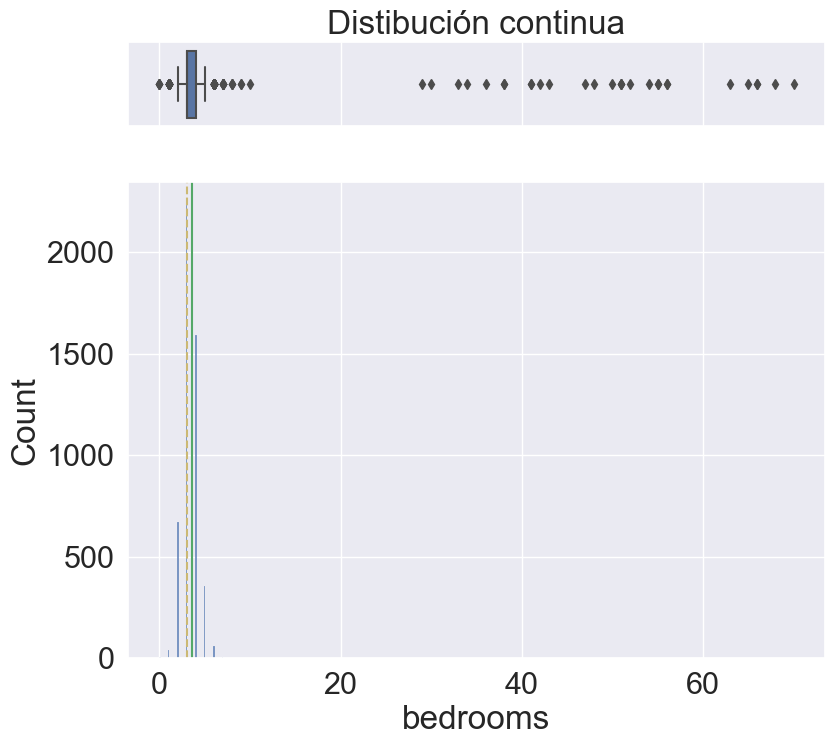

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



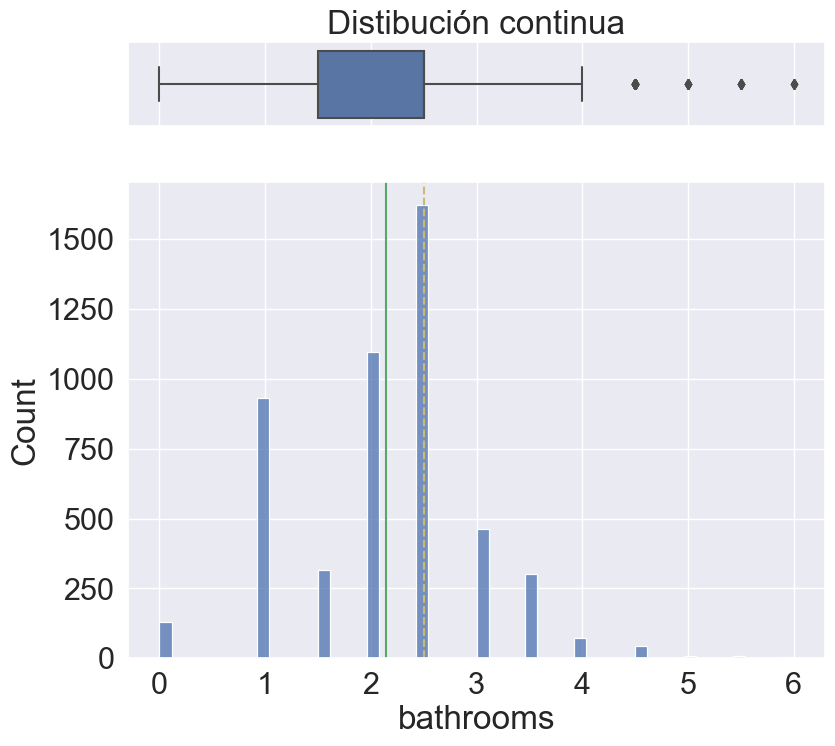

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



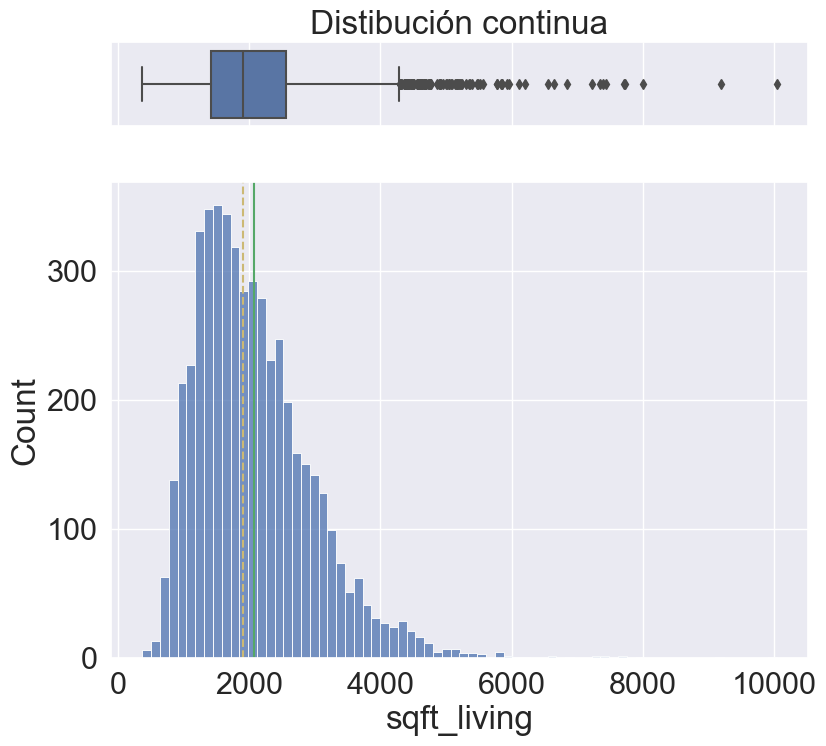

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



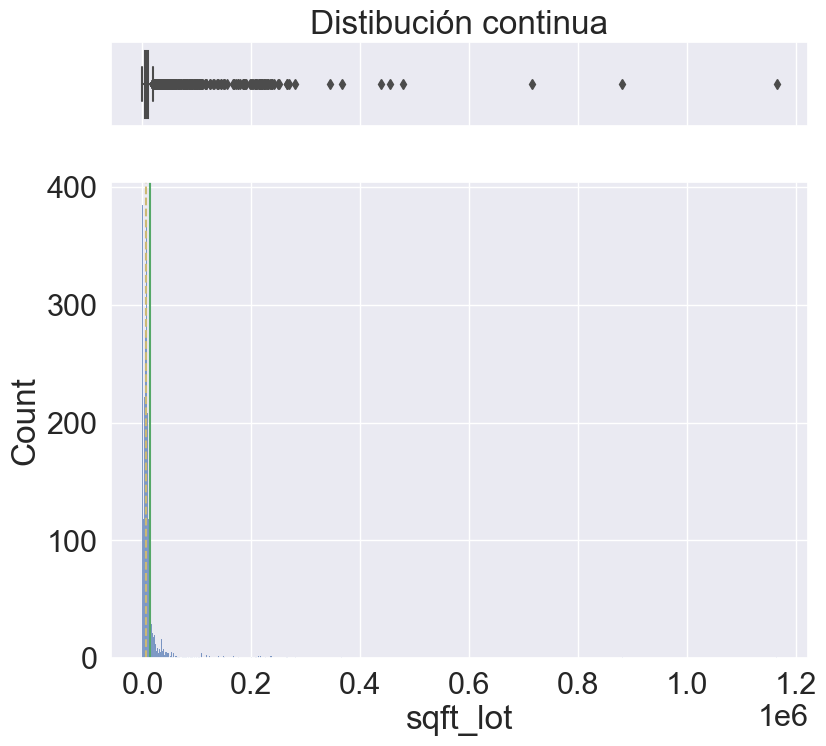

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: Fu

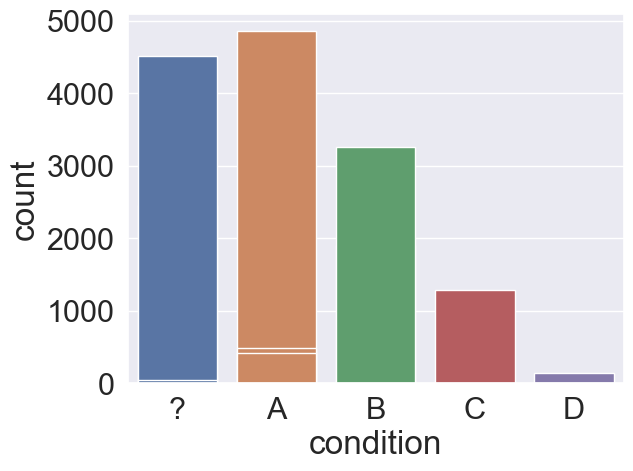

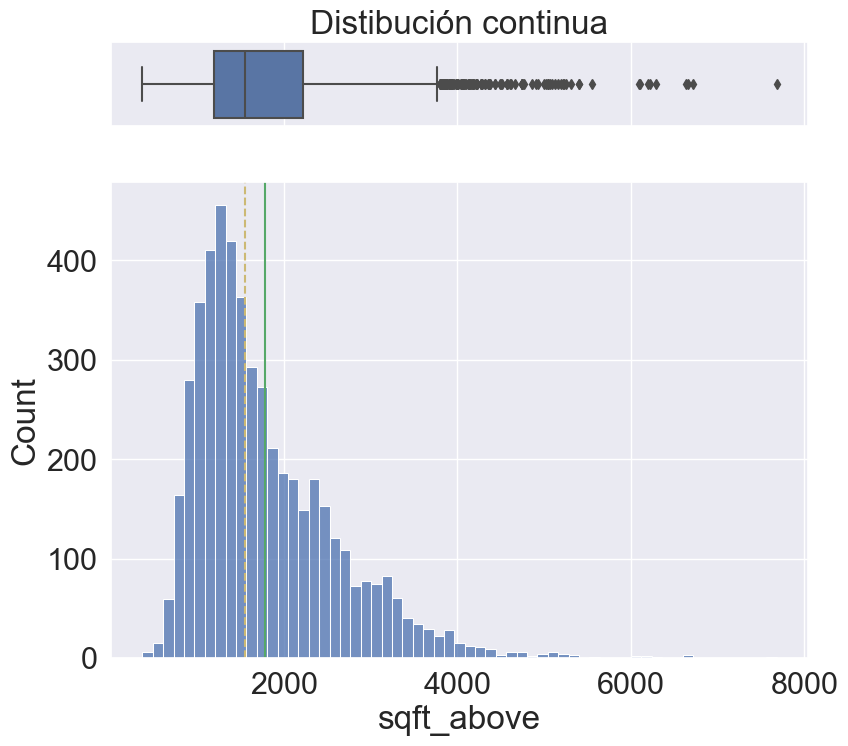

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



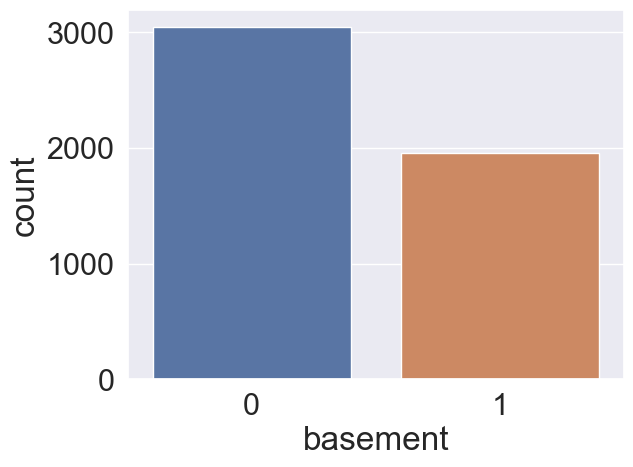

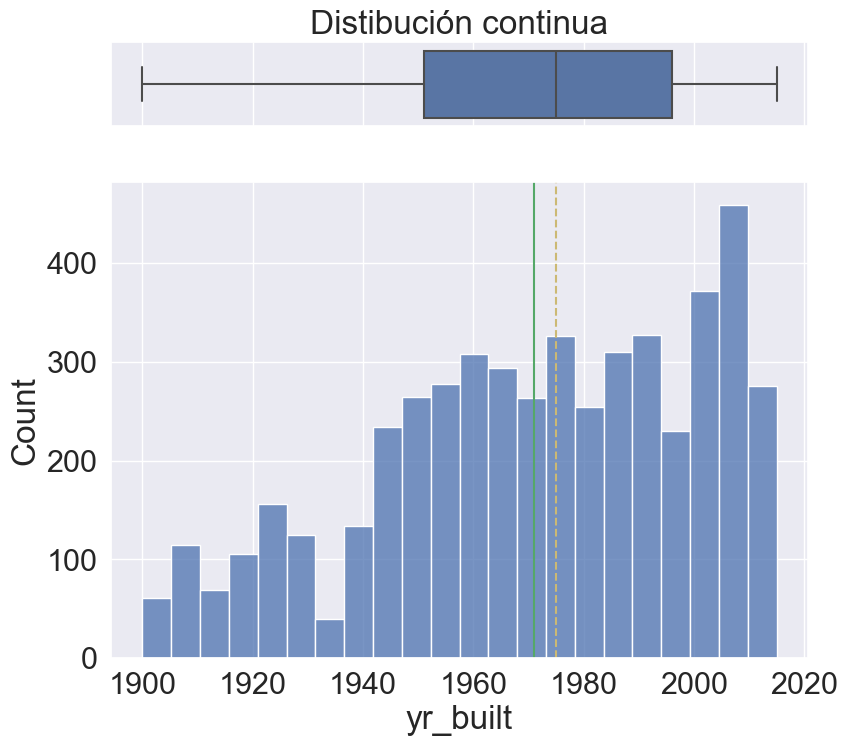

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



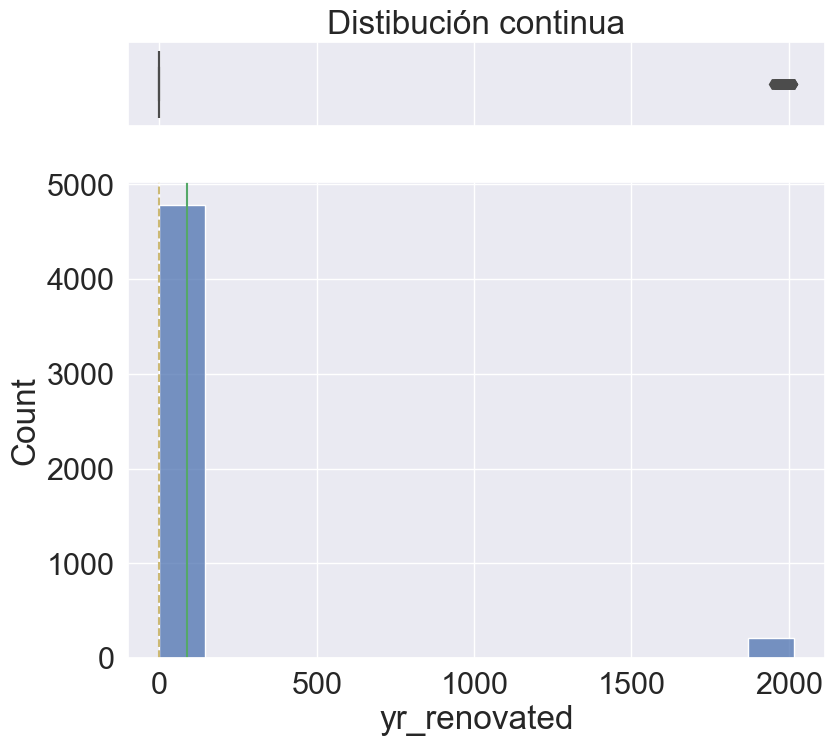

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



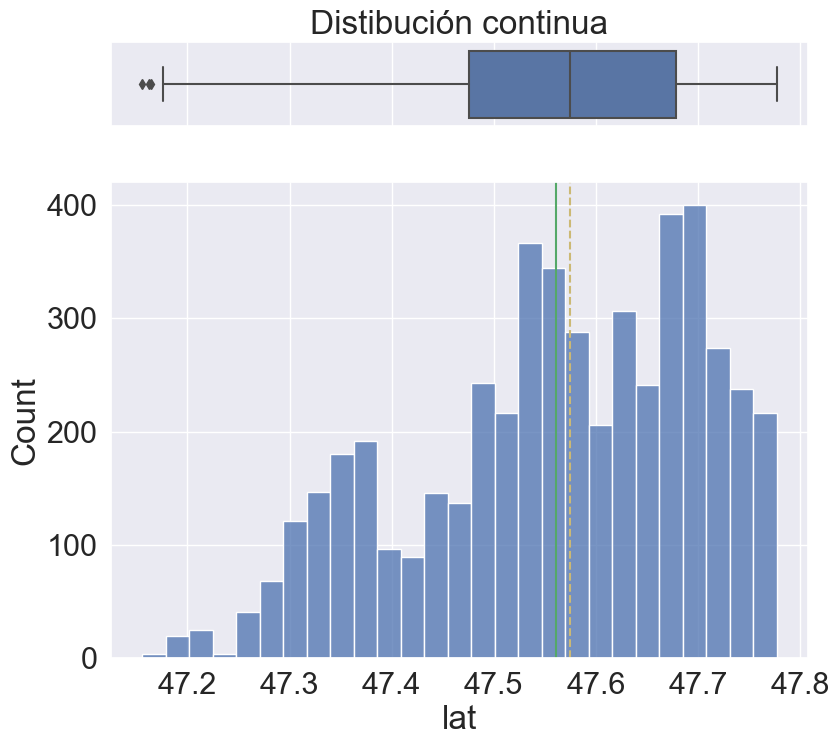

C:\Users\clayt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



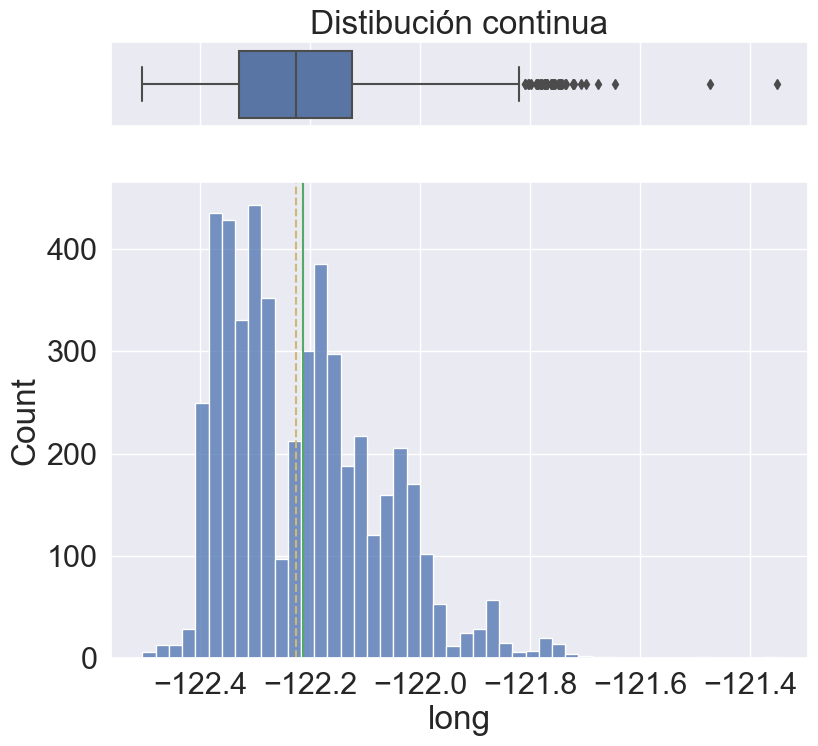

month           None
price           None
Luxury          None
bedrooms        None
bathrooms       None
sqft_living     None
sqft_lot        None
floors          None
waterfront      None
view            None
condition       None
sqft_above      None
basement        None
yr_built        None
yr_renovated    None
lat             None
long            None
dtype: object

In [186]:
def plot(col):
     if col.dtypes != 'category':
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        cat_plot(col)
        
housing.apply(plot)


### Interpretation of Graphs

Issues to Address:
1. Potential Outliers: The variables bedrooms, sqft_living and sqft_above appear to have outliers.

2. Missing Data: Sqft_lot appears to have missing data that has coded with a value of -1. The variable condition appears to have missing values that have been coded with ?.

3. Improper coding of variables: Yr_renovated should be recoded as a binary variable or a categorical variable. Waterfront should be a dummy variable. We will assume that the values which have been coded with -1 should have been coded with 1.



Let us start by recoding sqft_lot so that the values of -1 are coded as NaN values and python reconizes them to be missing. We will do the same thing with condition and the values represented by "?"

In [209]:
housing['sqft_lot'] = housing['sqft_lot'].replace(-1, pd.NA)

In [210]:
housing['condition'] = housing['condition'].replace("?", pd.NA)

### Fixing improperly coded variables 

In [211]:
housing.yr_renovated.value_counts()

AttributeError: 'DataFrame' object has no attribute 'yr_renovated'

Here because 95% of our data falls into one category we will convert yr_renovation into a dummy variable which we will just call renovation. Values of 0 will be assigned in the instance of no renovation and 1 in the instance of renovation.

In [212]:
housing['renovation'] = housing['yr_renovated'].apply(lambda x: 0 if x == 0 else 1).astype('category')
housing = housing.drop(['yr_renovated'], axis=1)

KeyError: 'yr_renovated'

In [213]:
housing.renovation.value_counts()

renovation
0    4784
1     216
Name: count, dtype: int64

In [214]:
housing.waterfront.value_counts()

waterfront
0    4852
1     148
Name: count, dtype: int64

Here we will recode our data so that the variable waterfront is a dummy variable.

In [215]:
housing['waterfront'] = housing['waterfront'].apply(lambda x: 0 if x == 0 else 1).astype('category')

In [216]:
housing.waterfront.value_counts()

waterfront
0    4852
1     148
Name: count, dtype: int64

Let us define our objective variable

In [217]:
varObj = housing.price
imput = housing.drop(['price'],axis=1)

imput.head()


,month,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,lat,long,renovation
0,7,1,3,2.5,2070,NaN,1.0,0,0,C,1540,1,1980,47.5936,-122.013,0
1,6,1,2,1.5,1640,NaN,1.5,0,0,A,1540,1,1916,47.6624,-122.325,0
2,10,1,4,3.5,3720,NaN,1.0,0,1,B,3720,0,2007,47.3216,-121.940,0
3,12,1,3,3.5,2260,NaN,2.0,0,0,B,1880,1,2003,47.6422,-122.361,0
4,10,0,3,2.0,2050,NaN,1.0,0,0,A,1170,1,1960,47.7447,-122.328,0


### Outlier Treatment

We will consider a data value an outlier if it meet one of the following two conditions:
1. Assuming that the distribution of the data is normal, the value is more than three standard deviations away from the median or greater than 6 median absolute deviations away from the median.
2. The value is more than three times the value of the interquartile range below quartile 1 or above quartile 3.

Once we have identified our outliers we have to decide how to treat them. We have two main options:
1. Outlier compression through winsorization
2. Convert the outliers to missing values

We are going to create a function that accomplishes two things:
1. Outlier identification
2. Gives us the choice of outlier treatment.

Let us create a function to perfrom winsorization with pandas

In [218]:
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [219]:
from scipy import stats 

def gestiona_outliers(col,clas = 'check'):
     print(col.name)
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>6 
     
         
     q1 = col.quantile(0.25)    
     q3 = col.quantile(0.75)
     IQR=q3-q1
     
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingBefore: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingAfter: ' + str(col.isna().sum()) +'\n')
            return(col)


Let us create a copy of our continous data on which we will perform winsorization

In [220]:
housingCont = imput.select_dtypes(include=np.number).copy()

In [221]:
housing_winsor = housingCont.apply(lambda x: gestiona_outliers(x,clas='winsor'))

month
bedrooms
bathrooms
sqft_living
sqft_above
yr_built
lat
long


Now let us join our winsorized continuous variables with our categorical variables.

In [222]:
imput_wins = housing_winsor.join(imput.select_dtypes(exclude=np.number))
imput_wins

,month,bedrooms,bathrooms,sqft_living,sqft_above,yr_built,lat,long,Luxury,sqft_lot,floors,waterfront,view,condition,basement,renovation
0,7,3,2.5,2070,1540,1980,47.5936,-122.013,1,NaN,1.0,0,0,C,1,0
1,6,2,1.5,1640,1540,1916,47.6624,-122.325,1,NaN,1.5,0,0,A,1,0
2,10,4,3.5,3720,3720,2007,47.3216,-121.940,1,NaN,1.0,0,1,B,0,0
3,12,3,3.5,2260,1880,2003,47.6422,-122.361,1,NaN,2.0,0,0,B,1,0
4,10,3,2.0,2050,1170,1960,47.7447,-122.328,0,NaN,1.0,0,0,A,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2,2.5,1390,1180,2007,47.5537,-122.282,0,1821,2.0,0,0,B,1,0
4996,1,4,2.0,1660,1660,1974,47.4483,-122.129,0,8160,1.0,0,0,B,0,0
4997,2,3,2.0,1480,1480,1968,47.3126,-122.361,0,8475,1.0,0,0,C,0,0
4998,3,3,3.0,2540,1580,1978,47.7540,-122.144,0,18900,1.0,0,0,B,1,0


### Treatment of Missing Values

We have three choices of what to do with our missing variables"
1. Remove them from our dataset.
2. Nothing
3. Imputation

Prior to our decision lets identify the occurences of missing variables.

In [224]:
#Proportion of missing values per variables
imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[0]*100)

month          0.0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
sqft_above     0.0
yr_built       0.0
lat            0.0
long           0.0
Luxury         0.0
sqft_lot       0.0
floors         0.0
waterfront     0.0
view           0.0
condition      0.0
basement       0.0
renovation     0.0
dtype: float64

Here we can see that only two variables have missing values, sqft_lot and condition. Because the proportion of missing values for condition is very low (0.8%) we can safely eliminate these variables from our dataset. For sqft_lot, the proportion of missing variables is higher (7.64%). We will not eliminate these data points from our dataset. Instead we will perform imputation. Our choice of imputation will be to perform Multiple Imputation with the IterativeImputer method.

In [225]:
imput_wins = imput_wins.dropna(subset=['condition'])

In [226]:
imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[0]*100)

month          0.0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
sqft_above     0.0
yr_built       0.0
lat            0.0
long           0.0
Luxury         0.0
sqft_lot       0.0
floors         0.0
waterfront     0.0
view           0.0
condition      0.0
basement       0.0
renovation     0.0
dtype: float64

In [227]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imput_wins['sqft_lot'] = imput_wins['sqft_lot'].replace(pd.NA, float('nan'))
imputer_iterative = IterativeImputer()
imput_wins.loc[:, 'sqft_lot'] = imputer_iterative.fit_transform(imput_wins[['sqft_lot']])

In [228]:
imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[0]*100)

month          0.0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
sqft_above     0.0
yr_built       0.0
lat            0.0
long           0.0
Luxury         0.0
sqft_lot       0.0
floors         0.0
waterfront     0.0
view           0.0
condition      0.0
basement       0.0
renovation     0.0
dtype: float64

### Saving Our Results in New File

In [229]:
housing_wins_imputed= pd.concat([imput_wins, varObj], axis=1)
print(housing_wins_imputed.dtypes)
housing_wins_imputed.to_csv('HousingData_winsImpute.csv')


month             int64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_above        int64
yr_built          int64
lat             float64
long            float64
Luxury         category
sqft_lot         object
floors         category
waterfront     category
view           category
condition      category
basement       category
renovation     category
price             int64
dtype: object
